In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, auc, roc_curve)

In [2]:
df = pd.read_csv('/content/Breast_cancer_dataset.csv')

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df.describe()

In [10]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum()

In [8]:
df['Unnamed: 32'].unique()

array([nan])

In [ ]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.sample(2)

In [14]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
sns.countplot(x="diagnosis",data=df)
plt.title('Count Plot- B:Benign & M:Malignant')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [52]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [55]:
#train & test for x & y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
lor = LogisticRegression()
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)

In [58]:
print(confusion_matrix(y_test,y_pred))

[[70  1]
 [ 4 39]]


In [59]:
print(accuracy_score(y_test,y_pred))

0.956140350877193


In [79]:
print(precision_score(y_test,y_pred, pos_label=0))

0.9459459459459459


In [67]:
print(precision_score(y_test,y_pred, pos_label=0))

0.9459459459459459


In [66]:
print(recall_score(y_test,y_pred, pos_label=1))

0.9069767441860465


In [68]:
print(recall_score(y_test,y_pred, pos_label=0))

0.9859154929577465


In [69]:
print(f1_score(y_test,y_pred, pos_label=1))

0.9397590361445783


In [70]:
print(f1_score(y_test,y_pred, pos_label=0))

0.9655172413793104


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [72]:
pipeline_lor = Pipeline([('scaler', StandardScaler()), ('lor', LogisticRegression())])
pipeline_lor.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lor', LogisticRegression())])

In [73]:
y_pred_pipeline_lor = pipeline_lor.predict(x_test)
acc_pipeline_lor = accuracy_score(y_test, y_pred_pipeline_lor)
print("Accuracy with Pipeline:", acc_pipeline_lor)

Accuracy with Pipeline: 0.9736842105263158


In [74]:
print(classification_report(y_test,y_pred_pipeline_lor))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



[[70  1]
 [ 2 41]]


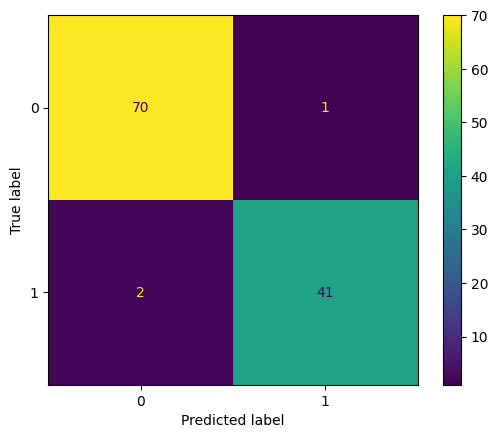

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred_pipeline_lor))
cm_lor = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_pipeline_lor), display_labels=pipeline_lor.classes_)
cm_lor.plot()
plt.show()

In [76]:
y_pred_test_prob = pipeline_lor.predict_proba(x_test)[:, 1]

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr) #x,y -> fpr, tpr

In [80]:
roc_auc*100

np.float64(99.737962659679)

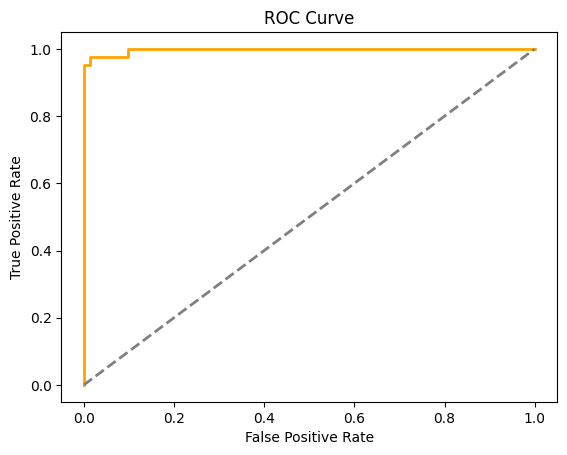

In [84]:
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2, color='grey')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()